In [2]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00


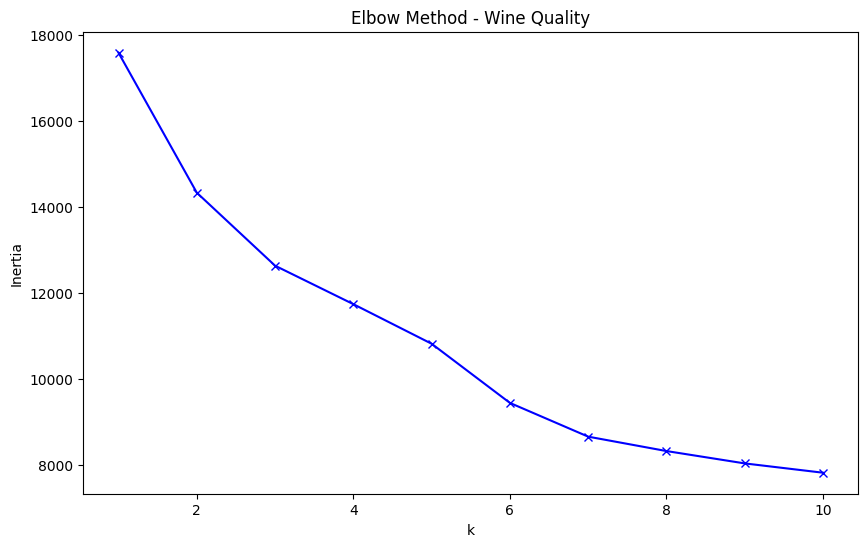


Wine Quality Results:
Cluster sizes: [722 502 375]


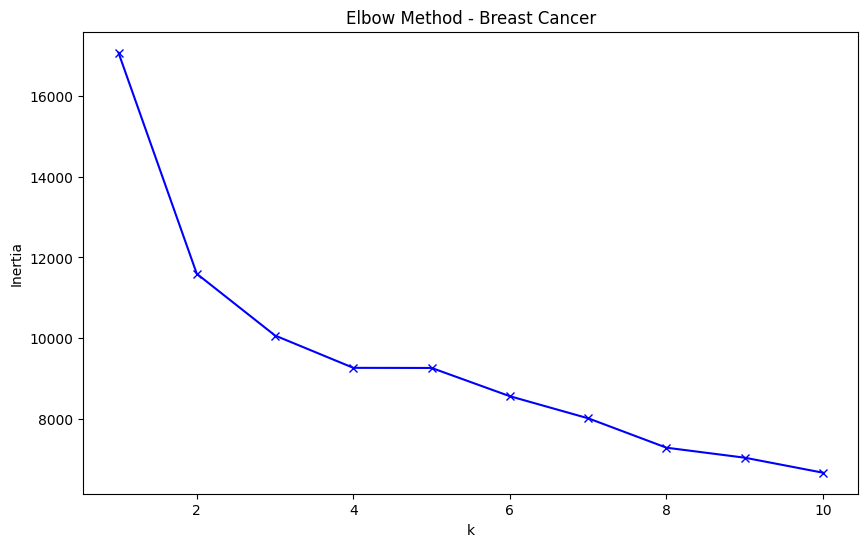


Breast Cancer Results:
Cluster sizes: [ 97 118 354]


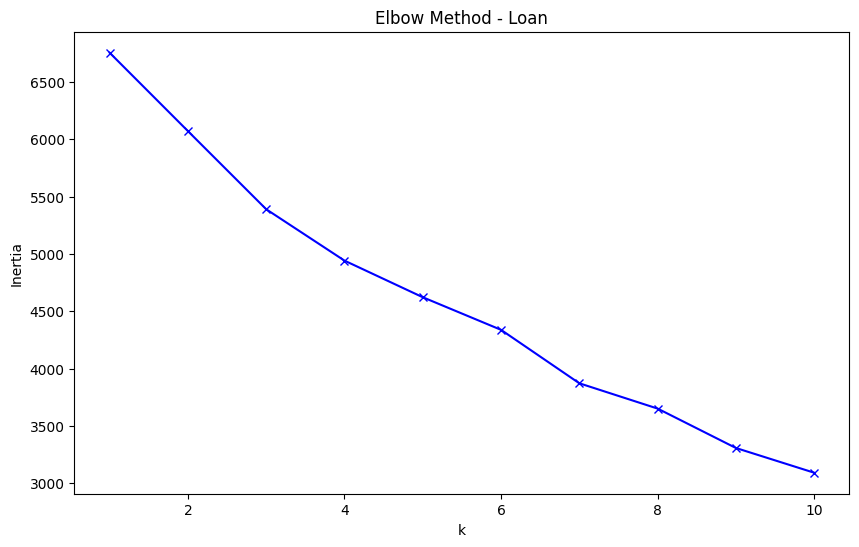


Loan Results:
Cluster sizes: [ 92 322 200]


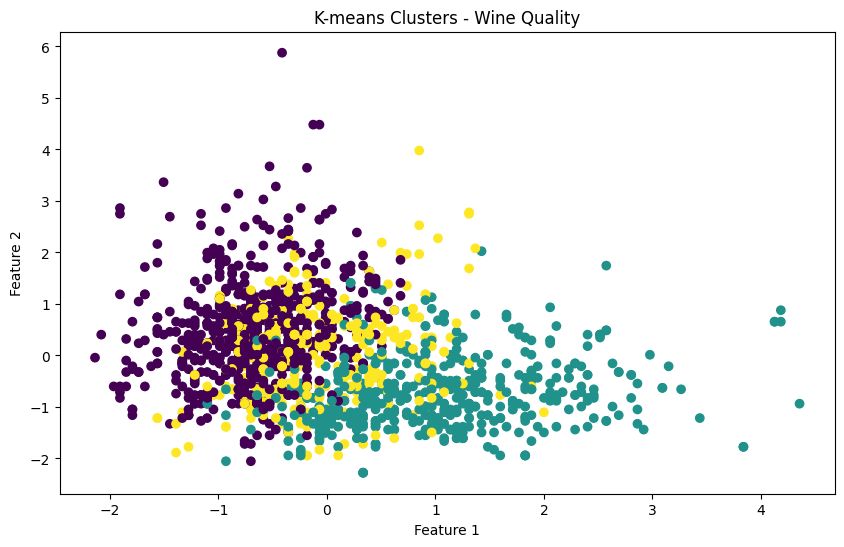

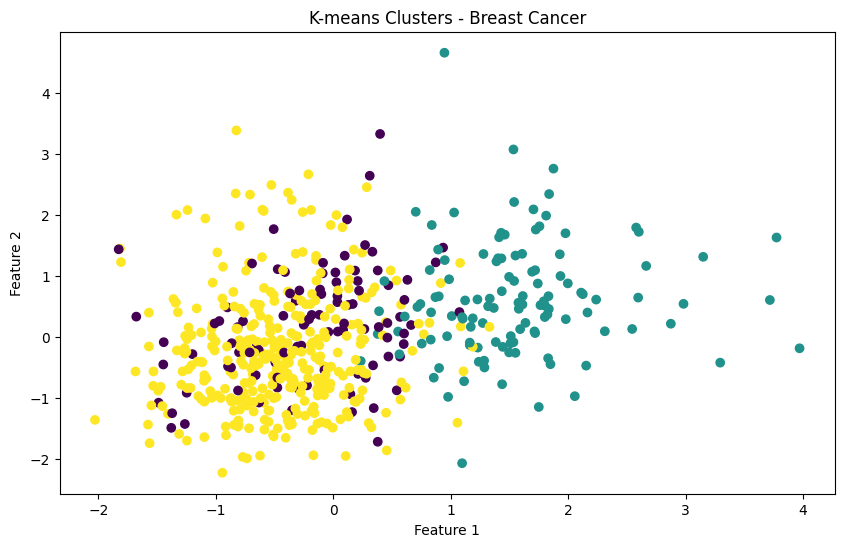

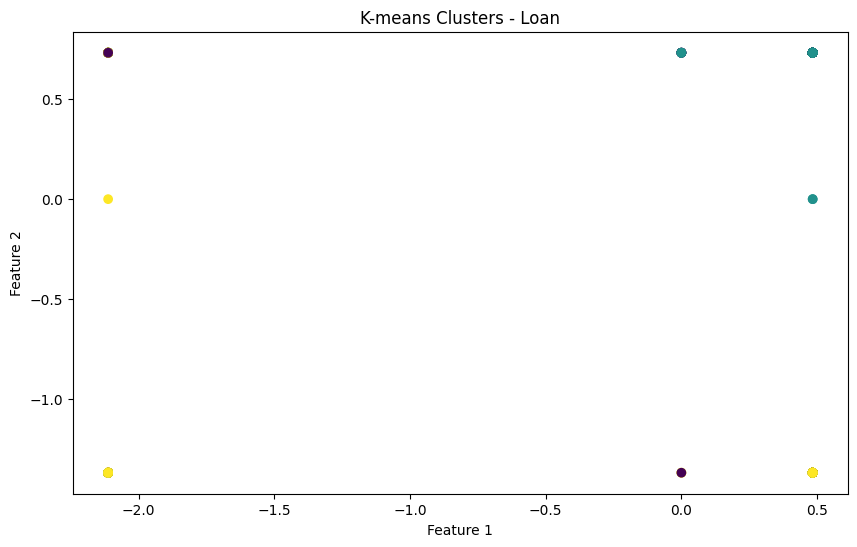

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def perform_clustering(X, dataset_name):
    # Handle missing values
    X = X.fillna(X.mean())

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method
    inertias = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10,6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method - {dataset_name}')
    plt.show()

    # Perform clustering
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    print(f"\n{dataset_name} Results:")
    print(f"Cluster sizes: {np.bincount(labels)}")

    return labels, X_scaled

# Wine Dataset
wine_df = pd.read_csv('winequality-red.csv')
X_wine = wine_df.drop('quality', axis=1)
wine_labels, X_wine_scaled = perform_clustering(X_wine, "Wine Quality")

# Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_labels, X_cancer_scaled = perform_clustering(X_cancer, "Breast Cancer")

# Loan Dataset
loan_df = pd.read_csv('loan_sanction_train.csv')
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Preprocess loan data
loan_df['Gender'] = loan_df['Gender'].map({'Male': 1, 'Female': 0})
loan_df['Married'] = loan_df['Married'].map({'Yes': 1, 'No': 0})
loan_df['Education'] = loan_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_df['Self_Employed'] = loan_df['Self_Employed'].map({'Yes': 1, 'No': 0})
loan_df['Property_Area'] = loan_df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', '3')
loan_df['Dependents'] = pd.to_numeric(loan_df['Dependents'], errors='coerce')

X_loan = loan_df[features]
loan_labels, X_loan_scaled = perform_clustering(X_loan, "Loan")

# Visualize clusters
def plot_clusters(X_scaled, labels, title):
    plt.figure(figsize=(10,6))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
    plt.title(f'K-means Clusters - {title}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot clusters
plot_clusters(X_wine_scaled, wine_labels, "Wine Quality")
plot_clusters(X_cancer_scaled, cancer_labels, "Breast Cancer")
plot_clusters(X_loan_scaled, loan_labels, "Loan")